# Conjunto de dados de previsão de aluguel de imóveis - Canadá
Este conjunto de dados contém informações sobre mais de 6987 imóveis disponíveis para aluguel


O Canadá é um país localizado na América do Norte, com uma área de 9,98 milhões de km², sendo o segundo maior país do mundo em área territorial. O país é composto por dez províncias e três territórios, com uma população de aproximadamente 38 milhões de pessoas.
O Canadá é conhecido por suas paisagens naturais deslumbrantes, que incluem as Montanhas Rochosas, as Cataratas do Niágara, as praias do Atlântico e as vastas planícies das pradarias. O país também é famoso por suas cidades vibrantes, como Toronto, Vancouver e Montreal, que são centros de arte, cultura e negócios.

## Obtenção dos Dados

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `canada.csv` - *Summary information and metrics for listings in Canadá (good for visualisations).*

In [1]:
#importando pacotes necessarios 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo canada.csv para um DataFrame
df = pd.read_csv('canada.csv')
display (df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,685591812209668709,Superbe Appartement Plateau Mont-Royal,214303569,Jean-Georges,NaN,Le Plateau-Mont-Royal,45.536150,-73.583720,Entire home/apt,75,31,2,2022-11-11,0.33,9,240,2,NaN
1,851313496658648587,XVIP #08 Indoor* Parking* RV,490357119,August,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.463639,-73.615013,Entire home/apt,20,1,0,NaN,NaN,8,146,0,300481
2,588937618904116518,New refurbished 3-bedrooms with 5 star location,428842796,Jingwei,NaN,Côte-des-Neiges-Notre-Dame-de-Grâce,45.495087,-73.626968,Entire home/apt,180,31,39,2022-11-02,3.24,3,118,39,NaN
3,772688317959641780,6 shared room with mini-fridge,469927526,Salah,NaN,Villeray-Saint-Michel-Parc-Extension,45.577300,-73.611240,Shared room,22,31,2,2023-02-24,0.63,6,265,2,000
4,51867183,My Cozy Home,420148695,Saima,NaN,Le Sud-Ouest,45.478780,-73.554350,Entire home/apt,210,365,0,NaN,NaN,1,365,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,53644973,*1BED Downtown MTL*All Included++,434416250,Angel,NaN,Ville-Marie,45.496750,-73.572900,Entire home/apt,80,32,4,2023-03-05,0.28,6,31,2,NaN
6983,21037355,"Beautiful cachet 2 bedrooms, kitchen,living room",25282125,Marlyn,NaN,Le Sud-Ouest,45.471080,-73.589690,Entire home/apt,70,31,133,2022-01-02,2.34,1,47,0,NaN
6984,671672662541642169,Panoramic Penthouse Skyline View - Free Parking,469650484,Mtl,NaN,Ville-Marie,45.492290,-73.576030,Entire home/apt,159,3,22,2023-03-26,3.71,2,218,22,303068
6985,20978847,Nice apartment all equipped/2 min walk from Metro,150953961,Mestapha,NaN,Le Sud-Ouest,45.450540,-73.590600,Entire home/apt,90,32,2,2019-10-03,0.03,1,0,0,NaN


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.



**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['Le Plateau-Mont-Royal', 'Côte-des-Neiges-Notre-Dame-de-Grâce',
       'Villeray-Saint-Michel-Parc-Extension', 'Le Sud-Ouest',
       'Mercier-Hochelaga-Maisonneuve', 'Verdun', 'Ville-Marie',
       'Lachine', 'Rosemont-La Petite-Patrie',
       'Rivière-des-Prairies-Pointe-aux-Trembles', 'Saint-Laurent',
       'Ahuntsic-Cartierville', 'Pointe-Claire', 'Montréal-Ouest',
       'Anjou', 'LaSalle', 'Montréal-Est', 'Mont-Royal',
       'Pierrefonds-Roxboro', 'Montréal-Nord', 'Beaconsfield',
       'Dollard-des-Ormeaux', 'Côte-Saint-Luc', 'Saint-Léonard',
       'Hampstead', 'Sainte-Anne-de-Bellevue', "Baie-d'Urfé",
       "L'Île-Bizard-Sainte-Geneviève", 'Dorval', 'Westmount',
       'Outremont', 'Kirkland'], dtype=object)

### **1. Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `canada.csv`. Há uma versão mais completa (`canada.csv.gz`).

In [4]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 6987
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.577072
reviews_per_month                 0.163590
last_review                       0.163590
name                              0.000286
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.


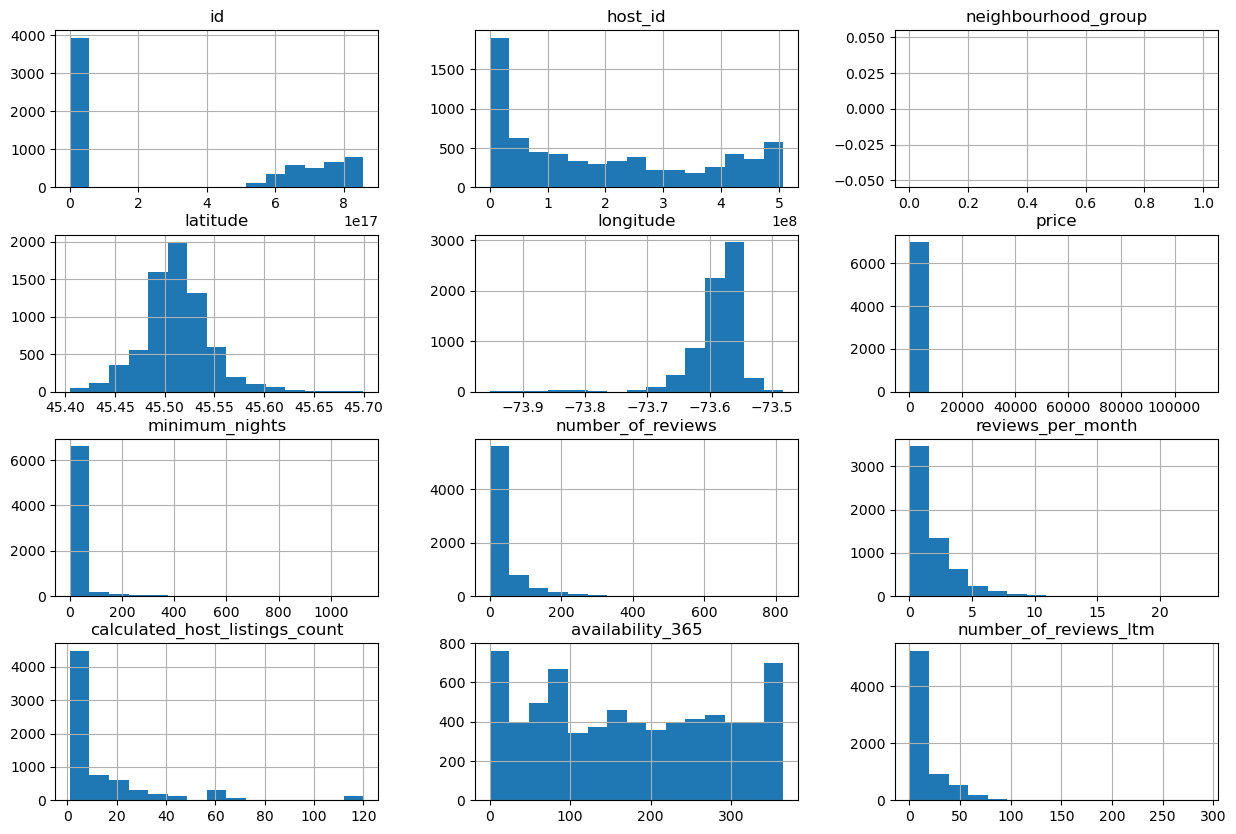

In [5]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [6]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6987.000000,6987.000000,6987.000000,5844.000000,6987.000000,6987.000000
mean,162.722198,28.694146,34.764133,1.737854,13.278517,175.783884
std,1357.115424,54.187433,61.821568,1.882266,21.282747,115.105917
min,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,67.000000,2.000000,2.000000,0.350000,1.000000,77.000000
50%,98.000000,31.000000,11.000000,1.070000,4.000000,170.000000
75%,149.000000,32.000000,41.000000,2.510000,16.000000,274.000000
max,110766.000000,1125.000000,821.000000,23.430000,120.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 149, porém seu valor máximo é 110766.
* A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights


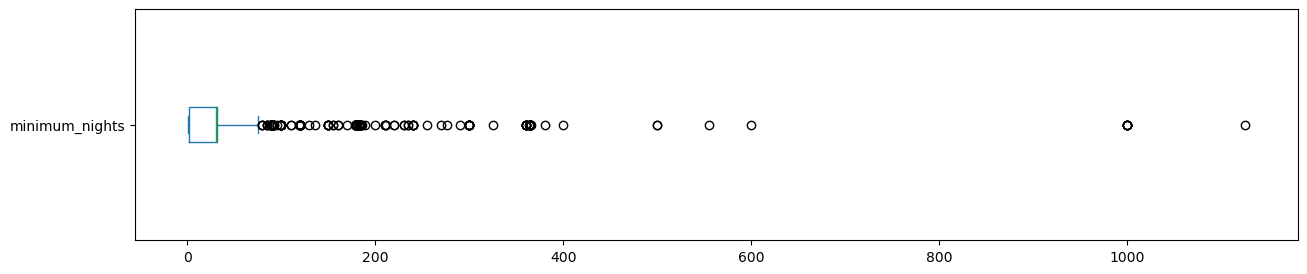

minimum_nights: valores acima de 30:
4170 entradas
59.6823%


In [7]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

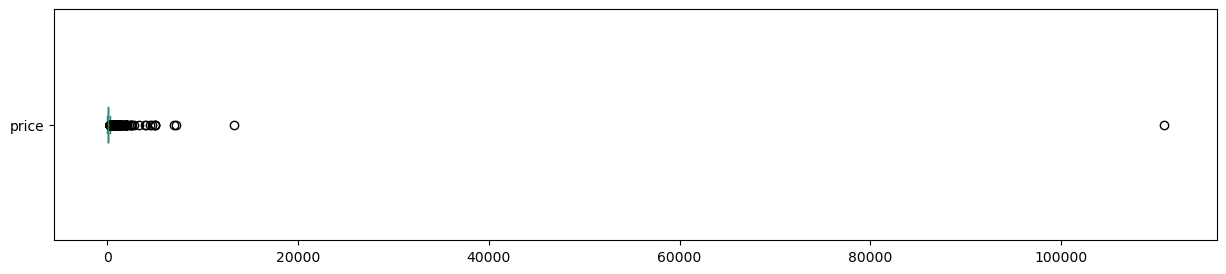


price: valores acima de 1200
50 entradas
0.7156%


In [8]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1200 para price
print("\nprice: valores acima de 1200")
print("{} entradas".format(len(df[df.price > 1200])))
print("{:.4f}%".format((len(df[df.price > 1200]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

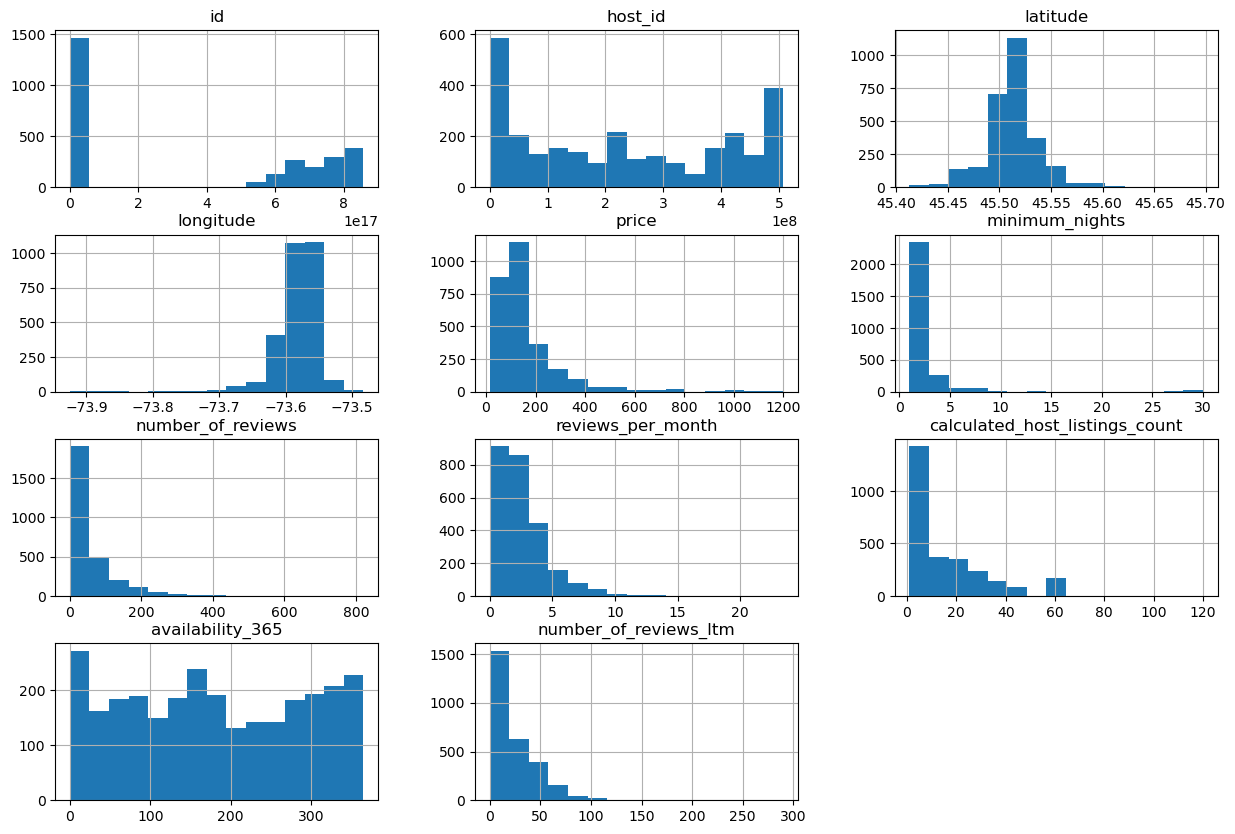

In [9]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [10]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.039368,-0.036129,-0.136621,-0.103324,0.018605
minimum_nights,0.039368,1.000000,-0.062296,-0.164769,-0.044029,-0.092277
number_of_reviews,-0.036129,-0.062296,1.000000,0.377880,-0.078589,-0.033441
reviews_per_month,-0.136621,-0.164769,0.377880,1.000000,0.036961,0.024354
calculated_host_listings_count,-0.103324,-0.044029,-0.078589,0.036961,1.000000,0.210253
availability_365,0.018605,-0.092277,-0.033441,0.024354,0.210253,1.000000


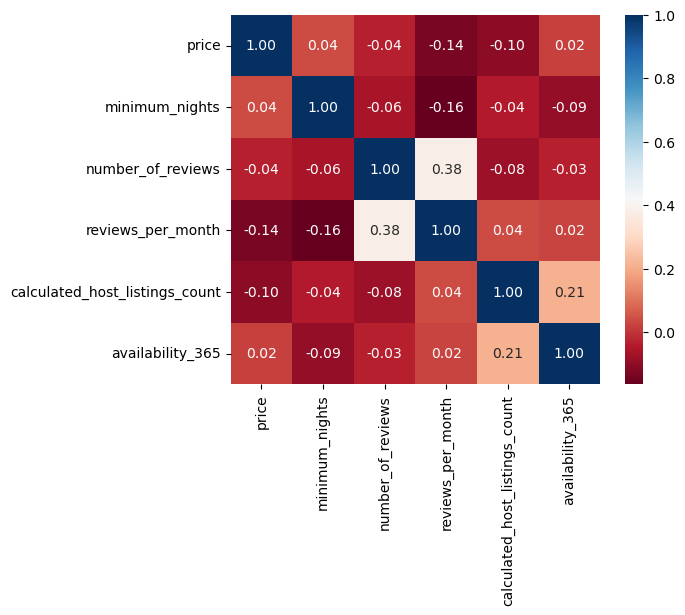

In [11]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [12]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2366
Private room        367
Shared room          46
Hotel room           21
Name: room_type, dtype: int64

### **6. Qual a localidade mais cara do Canadá?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [30]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
L'Île-Bizard-Sainte-Geneviève    372.000000
Baie-d'Urfé                      245.500000
Westmount                        229.272727
Montréal-Nord                    209.750000
Le Sud-Ouest                     209.215278
Beaconsfield                     190.000000
Outremont                        184.000000
Le Plateau-Mont-Royal            169.671312
Ville-Marie                      167.519084
Pointe-Claire                    163.500000
Name: price, dtype: float64

Acima, vemos que a comunidade L'Île-Bizard-Sainte-Geneviève está com média de preço superior a de lugares como Montréal-Nord, Le Plateau-Mont-Royal  e Pointe-Claire.

Uma pessoa que não conhecesse o Canadá poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para L'Île-Bizard-Sainte-Geneviève.

In [13]:
# ver quantidade de imóveis em L'Île-Bizard-Sainte-Geneviève
print(df[df.neighbourhood == "L'Île-Bizard-Sainte-Geneviève"].shape)

# ver as 4 entradas de L'Île-Bizard-Sainte-Geneviève
df[df.neighbourhood == "L'Île-Bizard-Sainte-Geneviève"]

(8, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
402,763793007898429952,LuLu's Chalet,488369802,Cai Ling,NaN,L'Île-Bizard-Sainte-Geneviève,45.513930,-73.897370,Entire home/apt,173,1,7,2023-03-19,2.84,1,194,7,148343
524,47489313,Logement 3 chambres épuré,27579788,Louis-Philippe,NaN,L'Île-Bizard-Sainte-Geneviève,45.474030,-73.875360,Entire home/apt,85,32,9,2023-03-02,0.63,1,152,7,NaN
643,739973941179630431,Luxury 3BR 7gst free park Pet friendly Longtime,157580052,Mahesh,NaN,L'Île-Bizard-Sainte-Geneviève,45.492040,-73.890380,Entire home/apt,525,31,2,2023-01-02,0.65,1,356,2,NaN
1054,30234270,"Cozy house, 4BR, 3bath, free parking, near air...",227058755,Chez Maria,NaN,L'Île-Bizard-Sainte-Geneviève,45.491190,-73.888890,Entire home/apt,333,2,62,2023-01-08,1.19,1,200,18,298091
1073,8990841,Huge modern waterfront residence !,75212378,Maude Et Pascal,NaN,L'Île-Bizard-Sainte-Geneviève,45.476100,-73.875350,Entire home/apt,265,32,9,2021-04-30,0.10,1,347,0,NaN
1997,46940231,Beautiful 5 bedroom chalet with pool,86591136,Mary,NaN,L'Île-Bizard-Sainte-Geneviève,45.475140,-73.892790,Entire home/apt,180,31,9,2022-10-01,0.46,3,205,1,NaN
2045,25741663,Lakefront Chalet Ile-Bizard Montreal,193541084,Yacine,NaN,L'Île-Bizard-Sainte-Geneviève,45.492570,-73.924890,Entire home/apt,607,2,39,2023-02-26,0.68,1,222,6,308594
6323,749094742270572275,Country Oasis Escape from the City in Ile-Bizard,97765682,Samantha,NaN,L'Île-Bizard-Sainte-Geneviève,45.517828,-73.873203,Entire home/apt,375,1,4,2023-03-25,2.22,1,298,4,012486


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

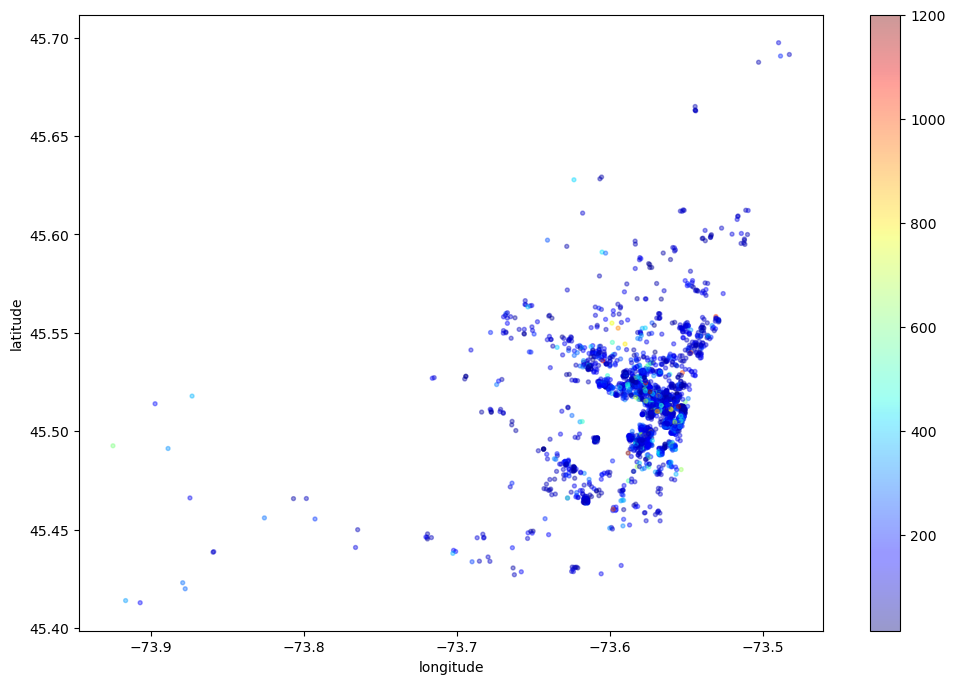

In [14]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Através da análise exploratória dos dados, foi possível identificar que o preço do aluguel de casas está fortemente relacionado com a localização, tamanho da propriedade e número de quartos.

Com base nesses insights, é possível concluir que a busca por imóveis para aluguel no Canadá pode ser facilitada com o uso de técnicas de análise de dados e machine learning. Além disso, a análise também pode ser útil para investidores e proprietários que desejam tomar decisões estratégicas com relação ao mercado imobiliário.